In [45]:
#from google.colab import drive
#drive.mount('/content/drive')

In [46]:
#!pip install python-dotenv

In [3]:
#import sys
#sys.path.append('/content/drive/My Drive/')

import utils

In [4]:
import pandas as pd

features = utils.load('features.csv')
#tracks = utils.load('/content/drive/My Drive/tracks.csv')

In [388]:
import pandas as pd

tracks = pd.read_csv('tracks.csv')
tracks.columns = tracks.iloc[0]
tracks = tracks.drop([0, 1])
new_cols = tracks.columns.values
new_cols[0] = 'track_id'
tracks.columns = new_cols
tracks = tracks.reset_index(drop=True)
tracks.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [5]:
features = features.reset_index()
features.head()

feature    track_id chroma_cens                                          \
statistics             kurtosis                                           
number                       01        02        03        04        05   
0                 2    7.180653  5.230309  0.249321  1.347620  1.482478   
1                 3    1.888963  0.760539  0.345297  2.295201  1.654031   
2                 5    0.527563 -0.077654 -0.279610  0.685883  1.937570   
3                10    3.702245 -0.291193  2.196742 -0.234449  1.367364   
4                20   -0.193837 -0.198527  0.201546  0.258556  0.775204   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            06        07        08        09  ...        04        05   
0           0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
1           0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
2           0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
3           0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
4           0.084794 -0.289294 -0.816410  0.043851  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
1           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
2           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
3           0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
4           0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
0           2.089872  0.061448  
1           1.716724  0.069330  
2           2.193303  0.044861  
3           3.542325  0.040800  
4           3.189831  0.030993  

[5 rows x 519 columns]

In [51]:
#small = tracks['set', 'subset'] <= 'small'

#train = tracks['set', 'split'] == 'training'
#val = tracks['set', 'split'] == 'validation'
#test = tracks['set', 'split'] == 'test'
import numpy as np


tracks['subset'] = tracks['subset'].astype('string')
tracks['split'] = tracks['split'].astype('string')
tracks['genre_top'] = tracks['genre_top'].astype('string')

y_train = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['genre_top']
y_val = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['genre_top']
y_test = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['genre_top']
X_train = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['mfcc']
X_test = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['mfcc']
X_val = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [52]:
np.unique(y_train)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [53]:
np.unique(y_test)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [54]:
import sklearn as skl

X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)
scaler = skl.preprocessing.StandardScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

RF = RandomForestClassifier()
ran_for = RF.fit(X_train, y_train)
RF_score = ran_for.score(X_train, y_train)

print("Random Forest Score: " + str(RF_score))

Random Forest Score: 0.99984375


In [55]:
RF_test = ran_for.score(X_val, y_val)

print("Random Forest Score: " + str(RF_test))

Random Forest Score: 0.51625


In [56]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [58]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=8, dtype='int32')
y_val = tf.keras.utils.to_categorical(y_val, num_classes=8, dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8, dtype='int32')

In [59]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train[0]

array([-0.22523181, -0.45338181,  0.40686407, -0.12711467,  0.0832777 ,
       -0.36699721, -0.65456896, -0.53287677, -0.51443483, -0.49639243,
        0.17098347,  0.11411216,  0.66632894,  2.09214894,  1.34797479,
        0.11942389,  0.55360107,  0.71199253,  4.13663218,  4.05247313,
        0.91566051,  0.62597671, -0.55880746, -1.34135543, -1.39236275,
       -1.22332363, -1.02467837, -1.14237013, -1.25273333, -0.8270932 ,
        0.14612826,  0.08486021, -0.40468563,  1.47947377,  0.71684398,
        0.38072489,  0.61538206,  0.42030442,  2.24254944,  2.27898357,
        0.16417312,  0.08655967, -0.91328789, -0.81375718, -0.96409979,
       -0.67928352, -1.50988924, -0.9497647 , -1.68141807, -0.75189375,
       -1.68415119, -1.41285163, -1.45857316, -0.86698835, -0.66983148,
       -0.39352314, -0.77294708, -0.94773729, -0.62375284, -0.84089234,
        0.25098007,  0.02972327, -0.87928279, -0.65440687, -0.95088382,
       -0.66292798, -1.55742187, -0.95760126, -1.67684384, -0.75

In [60]:
len(X_train)

6400

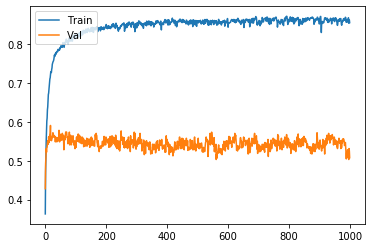

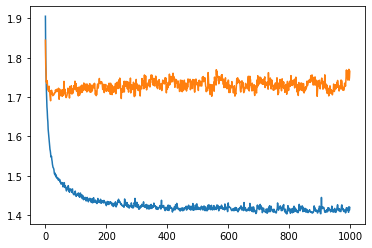

Train:
6400/1 - 1s - loss: 1.6316 - accuracy: 0.7216
[1.5551291966438294, 0.7215625]
Val:
800/1 - 0s - loss: 1.7213 - accuracy: 0.5150
[1.7588580560684204, 0.515]


In [63]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

activation='relu'
weight_init=None
optimizer=tf.keras.optimizers.Adam(lr=0.001)
metrics=['accuracy']
epochs = 1000
batch_size=None

model = tf.keras.Sequential()
model.add(Dense(100, activation=activation, kernel_initializer=weight_init, input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation=activation))
model.add(Dense(100, activation=activation))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[mcp_save])
plt.plot(history.history['' + metrics[0]])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

best_model = load_model('best_model.hdf5')
print("Train:")
print(best_model.evaluate(X_train, y_train, verbose=2))
print("Val:")
print(best_model.evaluate(X_val, y_val, verbose=2))

In [65]:
best_model.evaluate(X_test, y_test, verbose=2)

800/1 - 0s - loss: 1.8532 - accuracy: 0.4263


[1.8392126846313477, 0.42625]

### From audio instead of from features csv

In [389]:
import pickle
import numpy as np

mfcc = pickle.load(open('mfcc.pkl', 'rb'))
mfcc[0]

array([[-2.25310822e+02, -1.38351990e+02, -1.14121765e+02, ...,
         1.88393764e+01,  2.74668903e+01, -4.20031595e+00],
       [ 1.47226013e+02,  1.09761940e+02,  8.60581970e+01, ...,
         3.29497681e+01,  3.15308647e+01,  3.74996147e+01],
       [-9.10932312e+01, -7.32884598e+01, -5.58849220e+01, ...,
        -2.00935383e+01, -2.35903893e+01, -2.36109047e+01],
       ...,
       [ 1.43565893e+00,  2.43408203e-01, -6.02198601e-01, ...,
        -1.78685188e-02,  4.07983208e+00,  3.98852015e+00],
       [-1.59950428e+01, -1.68268204e+01, -1.50425673e+01, ...,
        -1.85527456e+00, -2.85183334e+00, -8.66340828e+00],
       [ 5.29949188e-01, -1.19427252e+00, -1.96158552e+00, ...,
         8.85653305e+00,  3.91285276e+00, -7.08737373e-01]], dtype=float32)

In [390]:
#features.loc[(tracks['subset'] == 'small')]['mfcc'].loc[[0]]

In [391]:
mfcc_df = pd.DataFrame(mfcc)
mfcc_df.head()

,0
0,"[[-225.31082, -138.35199, -114.121765, -101.74..."
1,"[[-234.39796, -141.91275, -107.215836, -83.674..."
2,"[[-136.30695, -40.796967, -3.1052394, -2.99612..."
3,"[[-533.94495, -469.86926, -396.42896, -303.211..."
4,"[[-469.85803, -343.57614, -249.99966, -237.107..."


In [392]:
index_nan = np.argwhere(pd.isnull(mfcc))

In [393]:
mfcc_df = mfcc_df.dropna()

In [394]:
len(mfcc_df)

7997

In [395]:
mfcc = mfcc_df.to_numpy().ravel()
mfcc[0]

array([[-2.25310822e+02, -1.38351990e+02, -1.14121765e+02, ...,
         1.88393764e+01,  2.74668903e+01, -4.20031595e+00],
       [ 1.47226013e+02,  1.09761940e+02,  8.60581970e+01, ...,
         3.29497681e+01,  3.15308647e+01,  3.74996147e+01],
       [-9.10932312e+01, -7.32884598e+01, -5.58849220e+01, ...,
        -2.00935383e+01, -2.35903893e+01, -2.36109047e+01],
       ...,
       [ 1.43565893e+00,  2.43408203e-01, -6.02198601e-01, ...,
        -1.78685188e-02,  4.07983208e+00,  3.98852015e+00],
       [-1.59950428e+01, -1.68268204e+01, -1.50425673e+01, ...,
        -1.85527456e+00, -2.85183334e+00, -8.66340828e+00],
       [ 5.29949188e-01, -1.19427252e+00, -1.96158552e+00, ...,
         8.85653305e+00,  3.91285276e+00, -7.08737373e-01]], dtype=float32)

In [396]:
mfcc[0].shape

(20, 1292)

In [397]:
for i in range(len(mfcc)):
    mfcc[i] = np.append(mfcc[i], np.zeros((20, 1293 - mfcc[i].shape[1])), axis=1)

In [398]:
index_nan = index_nan.ravel()

In [399]:
tracks = tracks.loc[tracks['subset'] == 'small']
tracks = tracks.reset_index()
tracks = tracks.drop(index_nan)

In [400]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

y_train = tracks.loc[(tracks['split'] == 'training')]['genre_top']
y_val = tracks.loc[(tracks['split'] == 'validation')]['genre_top']
y_test = tracks.loc[(tracks['split'] == 'test')]['genre_top']



In [401]:
len(y_train) + len(y_val) + len(y_test)

7997

In [402]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=8, dtype='int32')
y_val = tf.keras.utils.to_categorical(y_val, num_classes=8, dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8, dtype='int32')

In [407]:
mfcc = np.stack(mfcc.ravel()).reshape(-1, 20, 1293)

In [408]:
mfcc.shape

(7997, 20, 1293)